1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def gradientDescent(x, y, theta, alpha, m, numIterations, l2_penality):
    theta_list = [theta.copy()]
    errors = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = (np.sum(np.square(loss)) + l2_penality * np.sum(np.square(theta))) / (2 * m)
        
        if i % 1000 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = (np.dot(x.transpose(), loss) + l2_penality * theta) / m
        # update
        theta = theta - alpha * gradient
        
        theta_list.append(theta.copy())
        errors.append(cost)
    return theta, theta_list, errors

In [3]:
def stochasticGradientDescent(x, y, theta, alpha, m, numIterations, l2_penality):
    theta_list = [theta.copy()]
    errors = []
    xTrans = x.transpose()
    for i in range(0, numIterations):
        train_ind = np.random.randint(x.shape[0])
        hypothesis = np.dot(x[train_ind], theta)
        loss = hypothesis - y[train_ind]
        cost = (np.sum(np.square(loss)) + l2_penality * np.sum(np.square(theta))) / (2 * m)
        if i % 1000 == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = (np.dot(x[train_ind].transpose(), loss) + l2_penality * theta) / m
        # update
        theta = theta - alpha * gradient
        
        theta_list.append(theta.copy())
        errors.append((np.sum(np.square(np.dot(x, theta) - y)) + l2_penality * np.sum(np.square(theta))) / (2 * m))
    return theta, theta_list, errors

In [4]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [5]:
x_gt = data.copy()
y_gt = target.copy()
m, n = np.shape(x_gt)
numIterations= 10000
alpha = 0.1
theta = np.zeros(n)
l2_penality = 0
theta_gd, theta_list_gd, errors_gd = gradientDescent(x_gt, y_gt, theta, alpha, m, numIterations, l2_penality)
print(theta_gd)

Iteration 0 | Cost: 4095.358094
Iteration 1000 | Cost: 13.212952
Iteration 2000 | Cost: 13.212952
Iteration 3000 | Cost: 13.212952
Iteration 4000 | Cost: 13.212952
Iteration 5000 | Cost: 13.212952
Iteration 6000 | Cost: 13.212952
Iteration 7000 | Cost: 13.212952
Iteration 8000 | Cost: 13.212952
Iteration 9000 | Cost: 13.212952
[62.32796238 68.27977939]


In [6]:
x_sgt = data.copy()
y_sgt = target.copy()
m, n = np.shape(x_sgt)
numIterations= 10000
alpha = 0.1
theta = np.zeros(n)
l2_penality = 0
theta_sgd, theta_list_sgd, errors_sgd = stochasticGradientDescent(x_sgt, y_sgt, theta, alpha, m, numIterations, l2_penality)
print(theta_sgd)

Iteration 0 | Cost: 1.262017
Iteration 1000 | Cost: 0.392012
Iteration 2000 | Cost: 3.869918
Iteration 3000 | Cost: 0.174568
Iteration 4000 | Cost: 0.006363
Iteration 5000 | Cost: 2.488116
Iteration 6000 | Cost: 0.027396
Iteration 7000 | Cost: 2.297573
Iteration 8000 | Cost: 0.042866
Iteration 9000 | Cost: 0.167169
[38.20133988 41.89957292]


In [7]:
theta_list_gd = np.array(theta_list_gd)
errors_gd = np.array(errors_gd)
theta_list_sgd = np.array(theta_list_sgd)
errors_sgd = np.array(errors_sgd)

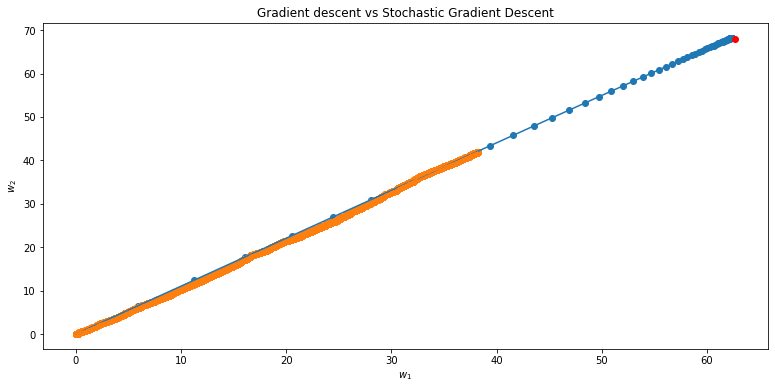

In [8]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent vs Stochastic Gradient Descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(theta_list_gd[:, 0], theta_list_gd[:, 1])
plt.scatter(theta_list_sgd[:, 0], theta_list_sgd[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(theta_list_gd[:, 0], theta_list_gd[:, 1])
plt.plot(theta_list_sgd[:, 0], theta_list_sgd[:, 1])

plt.show()

Stochastic Gradient Descent finds the optimal parameters much faster then Gradient descent.

Text(0, 0.5, 'MSE')

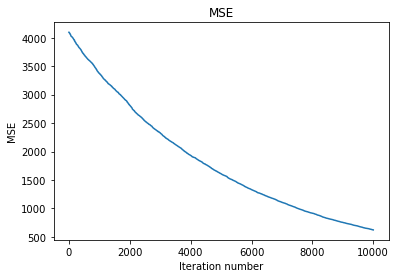

In [9]:
# Визуализируем изменение функционала ошибки
#plt.plot(range(len(errors_gd)), errors_gd)
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Stochastic Gradient Descent converges much faster compared to Gradient descent but the error function is not as well minimized as in the case of Gradient descent

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [10]:
x_gt = data.copy()
y_gt = target.copy()
m, n = np.shape(x_gt)
numIterations= 10000
alpha = 0.1
theta = np.zeros(n)
l2_penality = 0.5
theta_gd, theta_list_gd, errors_gd = gradientDescent(x_gt, y_gt, theta, alpha, m, numIterations, l2_penality)
print(theta_gd)

Iteration 0 | Cost: 4095.358094
Iteration 1000 | Cost: 15.348560
Iteration 2000 | Cost: 15.348560
Iteration 3000 | Cost: 15.348560
Iteration 4000 | Cost: 15.348560
Iteration 5000 | Cost: 15.348560
Iteration 6000 | Cost: 15.348560
Iteration 7000 | Cost: 15.348560
Iteration 8000 | Cost: 15.348560
Iteration 9000 | Cost: 15.348560
[62.29518772 68.24420945]


In [11]:
x_sgt = data.copy()
y_sgt = target.copy()
m, n = np.shape(x_sgt)
numIterations= 10000
alpha = 0.1
theta = np.zeros(n)
l2_penality = 0.5
theta_sgd, theta_list_sgd, errors_sgd = stochasticGradientDescent(x_sgt, y_sgt, theta, alpha, m, numIterations, l2_penality)
print(theta_sgd)

Iteration 0 | Cost: 1.262017
Iteration 1000 | Cost: 9.134052
Iteration 2000 | Cost: 7.015955
Iteration 3000 | Cost: 4.459546
Iteration 4000 | Cost: 0.332807
Iteration 5000 | Cost: 1.621303
Iteration 6000 | Cost: 0.721264
Iteration 7000 | Cost: 0.483576
Iteration 8000 | Cost: 2.737148
Iteration 9000 | Cost: 0.581485
[31.36540811 34.64142105]


In [12]:
theta_list_gd = np.array(theta_list_gd)
errors_gd = np.array(errors_gd)
theta_list_sgd = np.array(theta_list_sgd)
errors_sgd = np.array(errors_sgd)

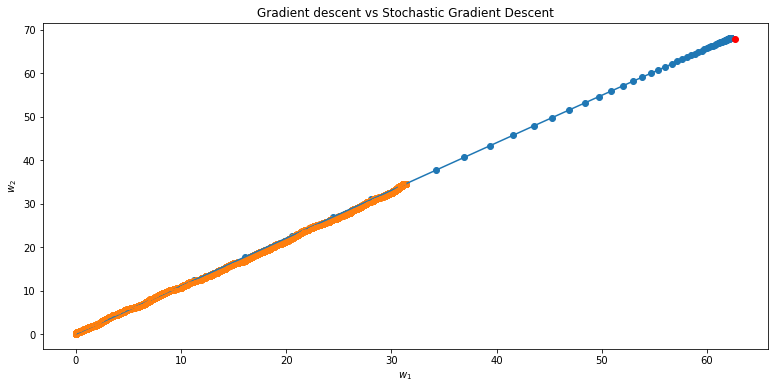

In [13]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent vs Stochastic Gradient Descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(theta_list_gd[:, 0], theta_list_gd[:, 1])
plt.scatter(theta_list_sgd[:, 0], theta_list_sgd[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(theta_list_gd[:, 0], theta_list_gd[:, 1])
plt.plot(theta_list_sgd[:, 0], theta_list_sgd[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

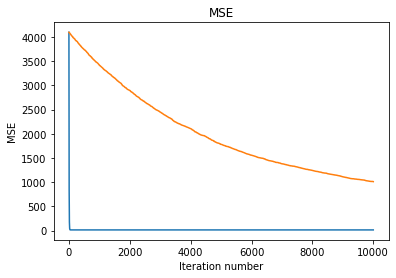

In [14]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_gd)), errors_gd)
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')